In [ ]:
CARACTERISTICAS PRINCIPALES DE LA BASE DE DATOS

In [8]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Cargar el dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Resumen de las primeras filas
print(df.head())

# Resumen estadístico de las columnas numéricas
print(df.describe())

# Información general sobre tipos de datos y valores nulos
print(df.info())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

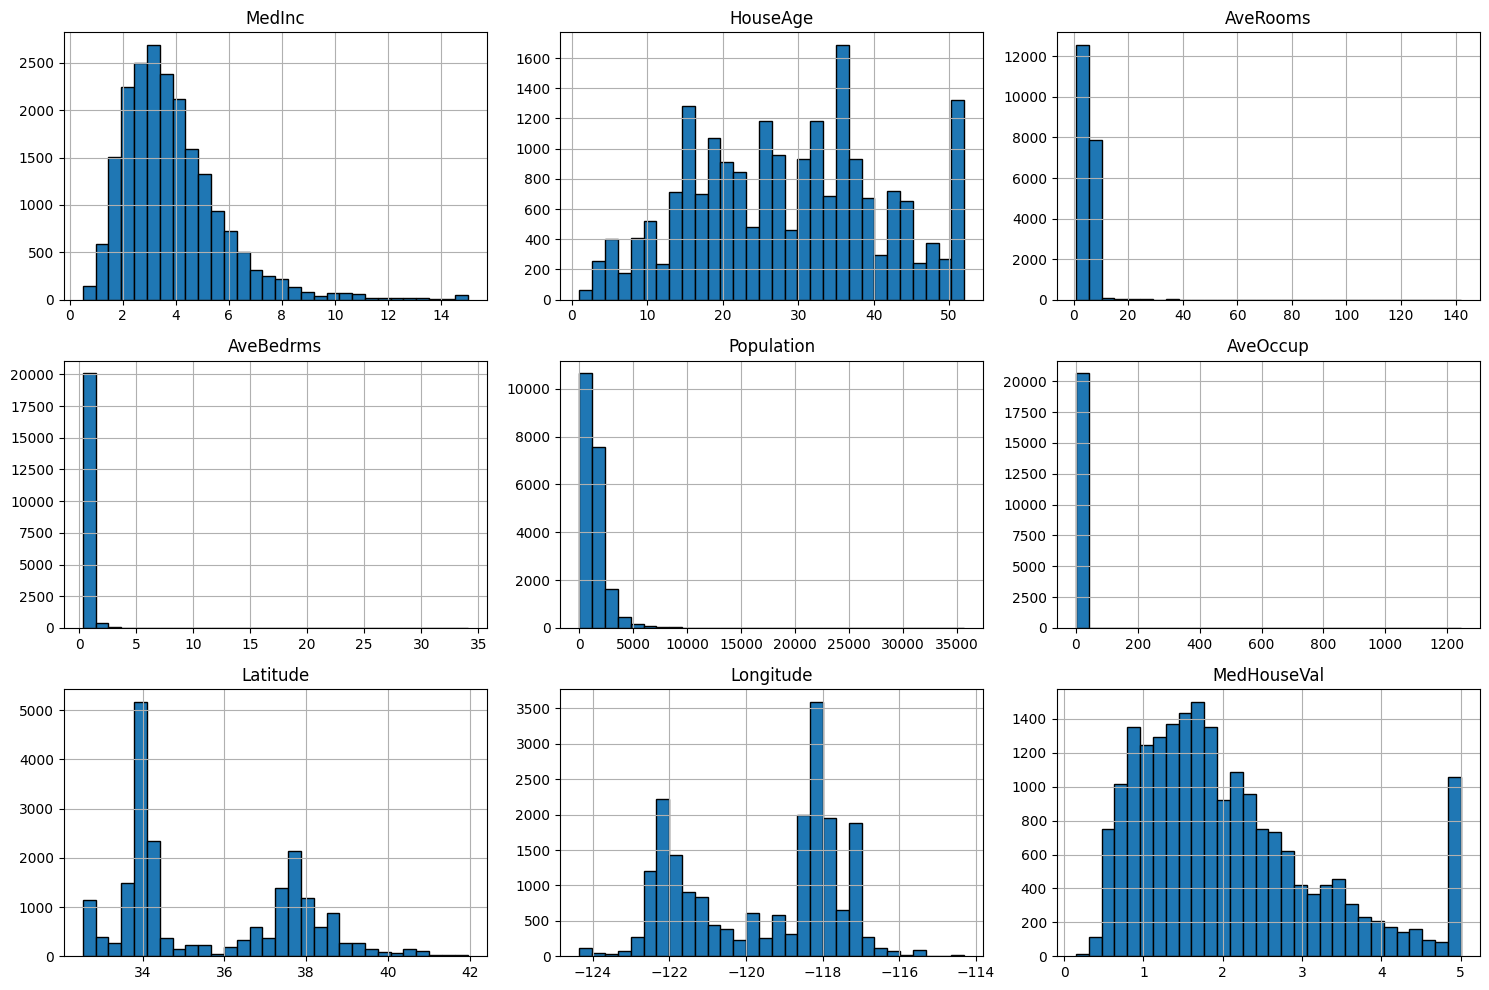

In [5]:
import matplotlib.pyplot as plt

# Histogramas para todas las características numéricas
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()


In [7]:
!pip3 install seaborn

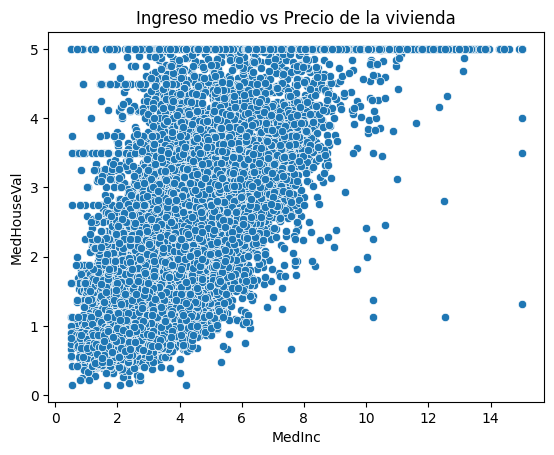

In [6]:
import seaborn as sns

# Relación entre median_income y el objetivo (Mediana de precio de la vivienda)
sns.scatterplot(data=df, x="MedInc", y=data.target)
plt.title("Ingreso medio vs Precio de la vivienda")
plt.show()


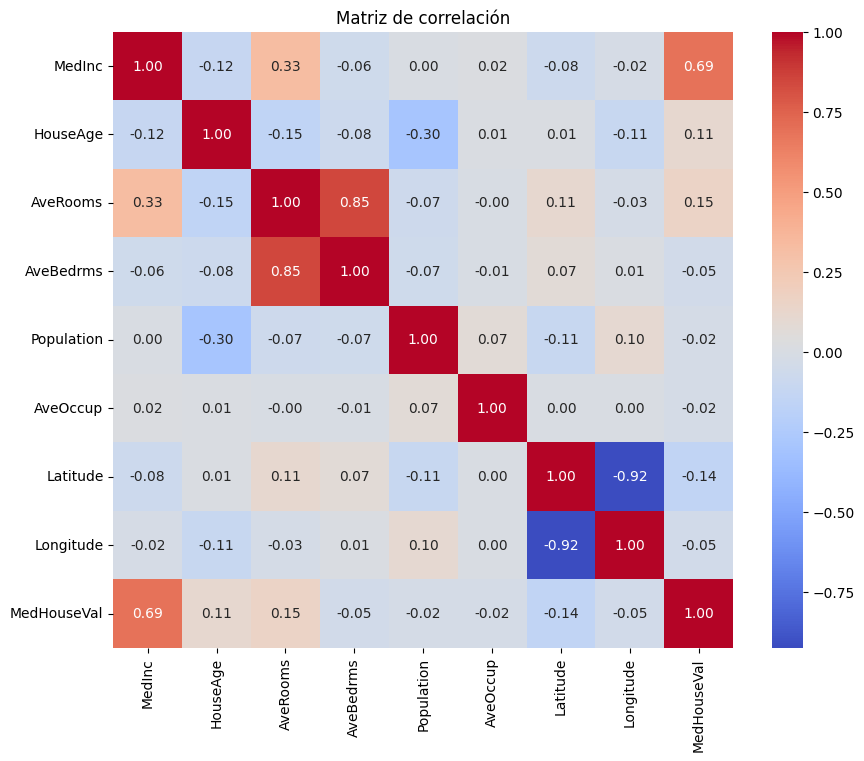

In [8]:
# Matriz de correlación
correlation_matrix = df.corr()

# Mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


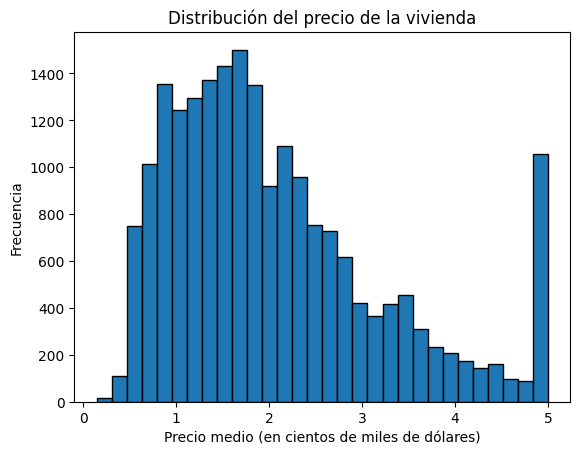

In [9]:
plt.hist(data.target, bins=30, edgecolor="black")
plt.title("Distribución del precio de la vivienda")
plt.xlabel("Precio medio (en cientos de miles de dólares)")
plt.ylabel("Frecuencia")
plt.show()


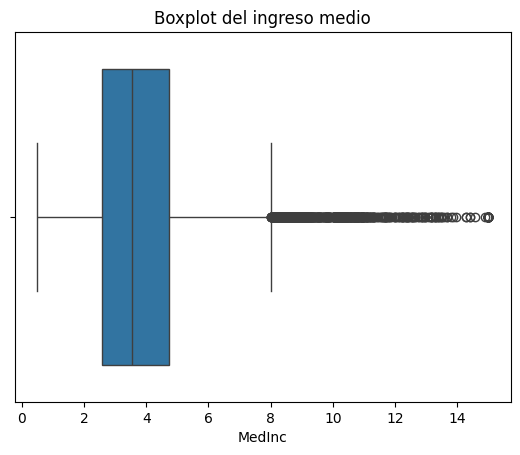

In [10]:
# Boxplot para una característica numérica
sns.boxplot(data=df, x="MedInc")
plt.title("Boxplot del ingreso medio")
plt.show()

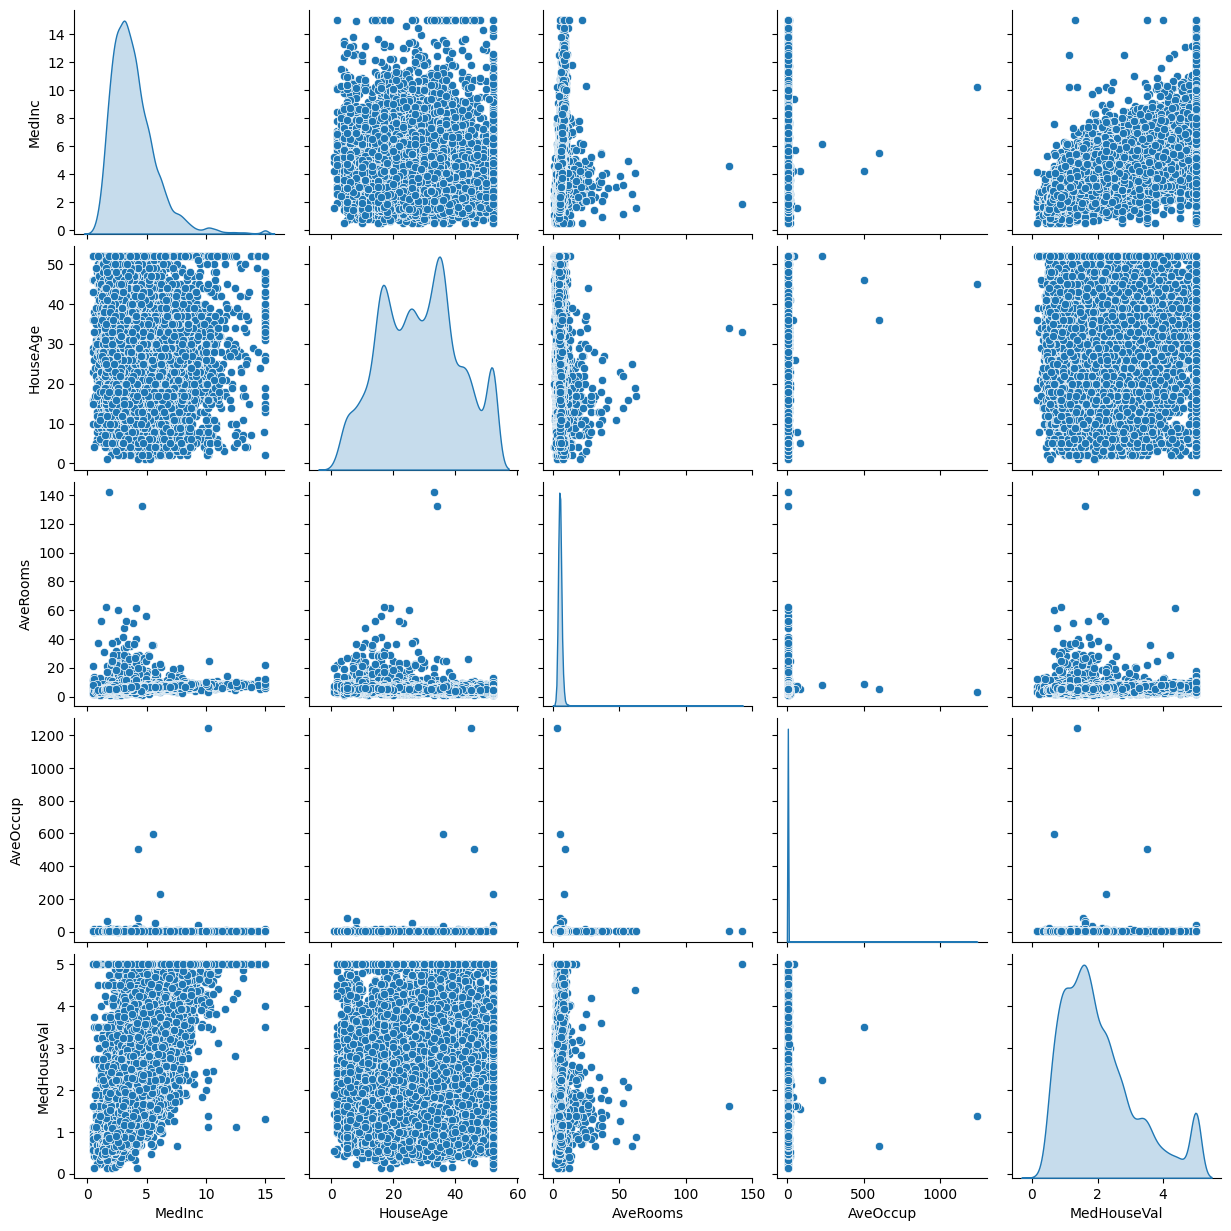

In [11]:
sns.pairplot(df[["MedInc", "HouseAge", "AveRooms", "AveOccup", data.target.name]], diag_kind="kde")
plt.show()


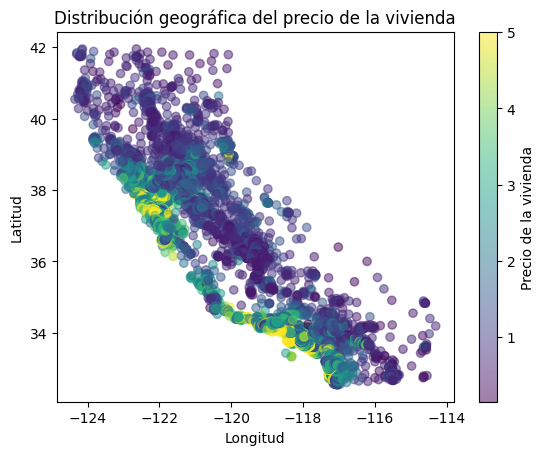

In [12]:
plt.scatter(df["Longitude"], df["Latitude"], c=data.target, cmap="viridis", alpha=0.5)
plt.colorbar(label="Precio de la vivienda")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Distribución geográfica del precio de la vivienda")
plt.show()


In [ ]:
PREPROCESAMIENTO

In [14]:
#Manejar valores faltantes (Missing Values)

import pandas as pd
from sklearn.impute import SimpleImputer

# Identificar valores faltantes
print(df.isnull().sum())  # Recuento de valores faltantes por columna

# Eliminar filas o columnas con valores faltantes
df_dropped = df.dropna()  # Elimina filas con valores faltantes
df_dropped_cols = df.dropna(axis=1)  # Elimina columnas con valores faltantes

# Imputación simple (rellenar valores faltantes)
imputer = SimpleImputer(strategy="mean")  # Cambiar a "median" o "most_frequent" según corresponda
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [15]:
# Escalar las características
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalización (Min-Max Scaling)
scaler_minmax = MinMaxScaler()
df_scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(df), columns=df.columns)

# Estandarización (Standard Scaling)
scaler_standard = StandardScaler()
df_scaled_standard = pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)

# Revisar las nuevas escalas
print(df_scaled_minmax.describe())
print(df_scaled_standard.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       0.232464      0.541951      0.032488      0.022629      0.039869   
std        0.131020      0.246776      0.017539      0.014049      0.031740   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.142308      0.333333      0.025482      0.019943      0.021974   
50%        0.209301      0.549020      0.031071      0.021209      0.032596   
75%        0.292641      0.705882      0.036907      0.022713      0.048264   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       0.001914      0.328572      0.476125      0.395579  
std        0.008358      0.226988      0.199555      0.237928  
min        0.000000      0.00000

In [6]:
#CODIFICAR VARIABLES CATEGORICAS 
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Ejemplo de un dataset con una columna categórica
df_categorical = pd.DataFrame({
    'Feature': ['Red', 'Green', 'Blue', 'Red', 'Blue', 'Green']
})

# One-Hot Encoding (sin sparse=False)
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(df_categorical)

# Convertir la matriz dispersa a un DataFrame
one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out())
print(one_hot_encoded_df)

# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(df_categorical['Feature'])
df_categorical['Feature_LabelEncoded'] = label_encoded
print(df_categorical)


   Feature_Blue  Feature_Green  Feature_Red
0           0.0            0.0          1.0
1           0.0            1.0          0.0
2           1.0            0.0          0.0
3           0.0            0.0          1.0
4           1.0            0.0          0.0
5           0.0            1.0          0.0
  Feature  Feature_LabelEncoded
0     Red                     2
1   Green                     1
2    Blue                     0
3     Red                     2
4    Blue                     0
5   Green                     1


In [11]:
#PIPELINE COMBINADO

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separar las columnas numéricas y categóricas
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns

# Transformadores para cada tipo de columna
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicar preprocesamiento al dataset
df_preprocessed = preprocessor.fit_transform(df)


In [ ]:
ANALISIS EXPLORATORIO DE DATOS

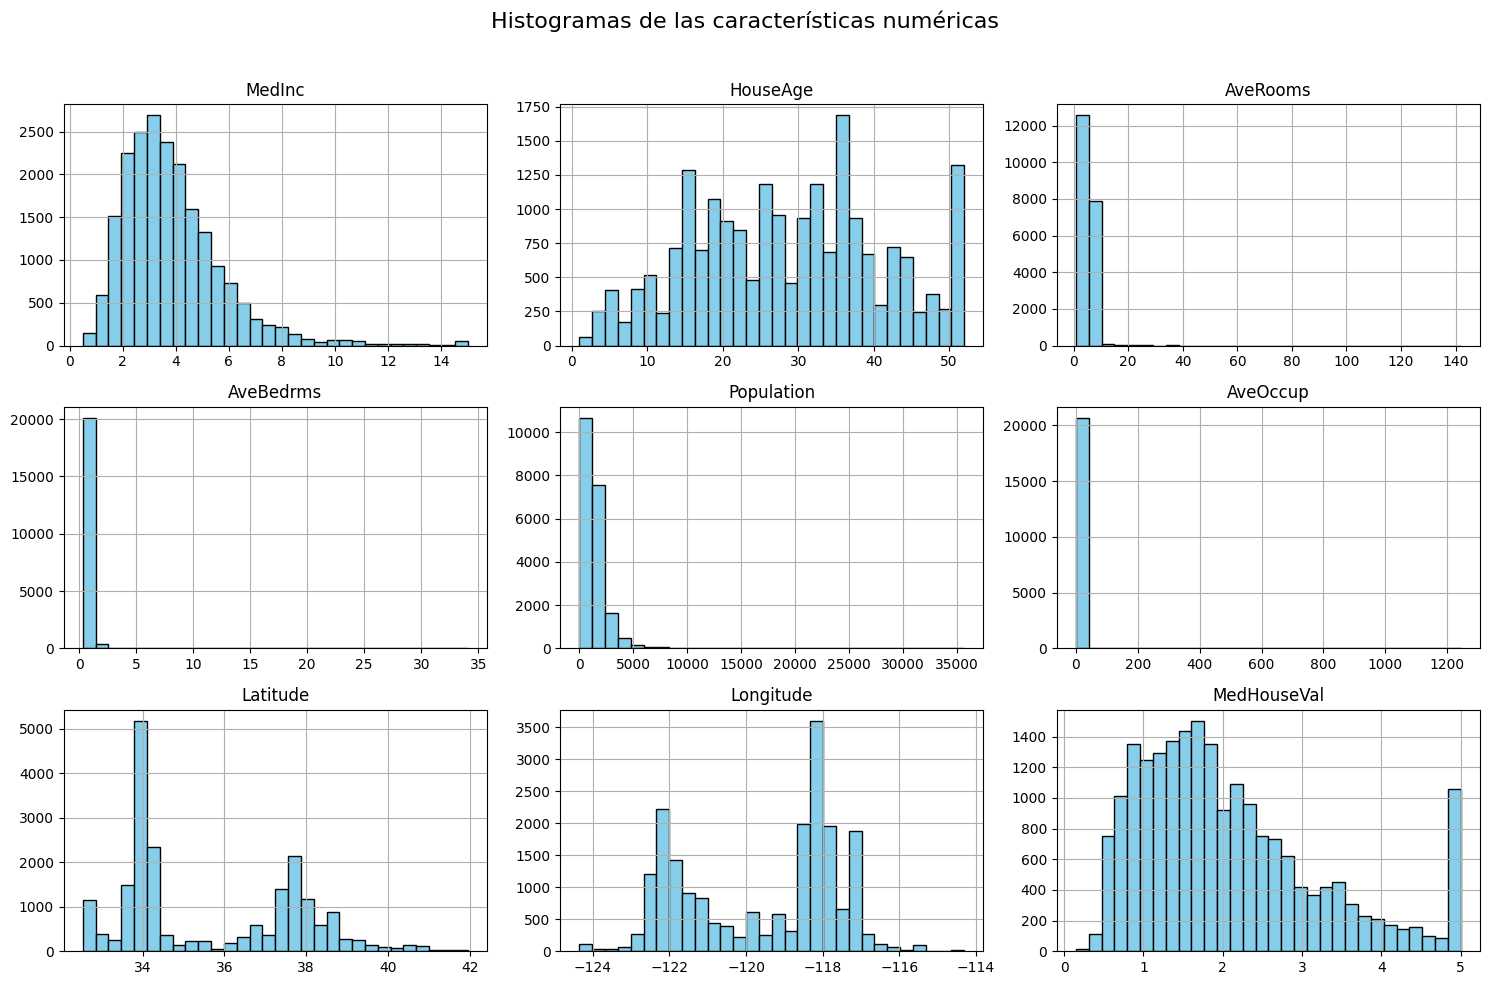

In [12]:
#Histogramas para características individuales

import matplotlib.pyplot as plt

# Crear histogramas para todas las características numéricas
df.hist(bins=30, figsize=(15, 10), edgecolor='black', color='skyblue')
plt.suptitle("Histogramas de las características numéricas", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar para que no se superponga el título
plt.show()


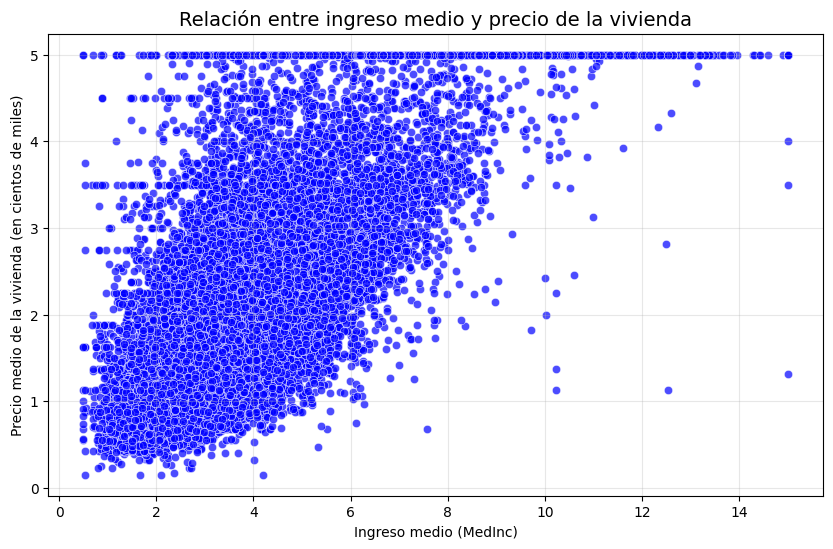

In [13]:
#Gráfico de dispersión entre características relevantes y el precio

import seaborn as sns

# Relación entre el ingreso medio y el precio medio de la vivienda
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="MedInc", y=data.target, alpha=0.7, color="blue")
plt.title("Relación entre ingreso medio y precio de la vivienda", fontsize=14)
plt.xlabel("Ingreso medio (MedInc)")
plt.ylabel("Precio medio de la vivienda (en cientos de miles)")
plt.grid(alpha=0.3)
plt.show()

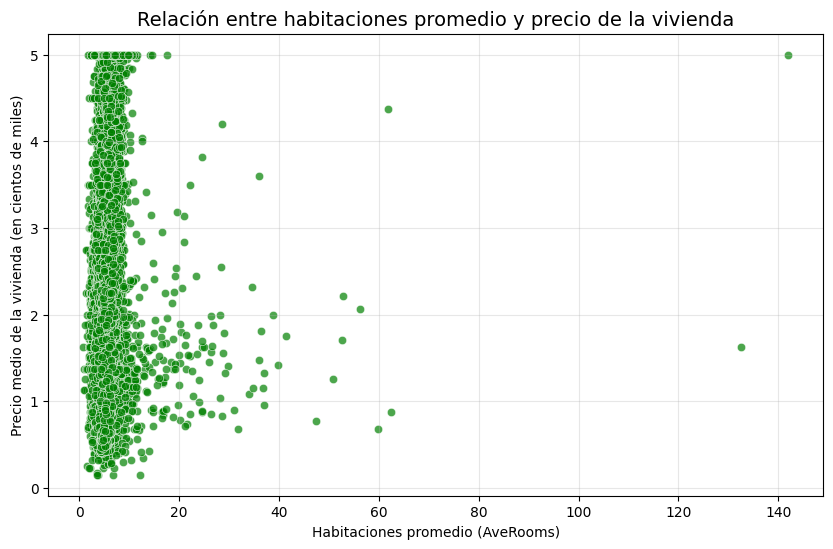

In [14]:
# Relación entre AveRooms (habitaciones promedio) y el precio de la vivienda
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="AveRooms", y=data.target, alpha=0.7, color="green")
plt.title("Relación entre habitaciones promedio y precio de la vivienda", fontsize=14)
plt.xlabel("Habitaciones promedio (AveRooms)")
plt.ylabel("Precio medio de la vivienda (en cientos de miles)")
plt.grid(alpha=0.3)
plt.show()


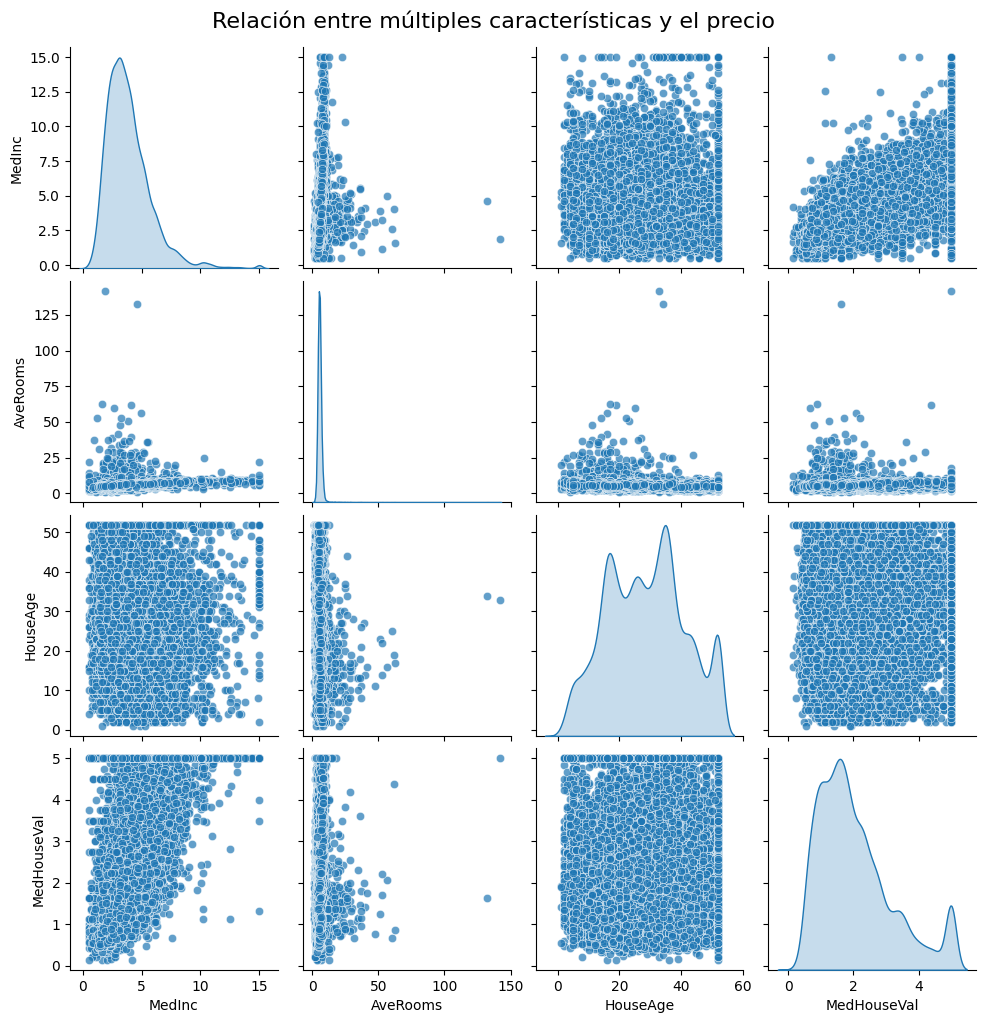

In [16]:
# Seleccionar características relevantes para un análisis más detallado
selected_features = ["MedInc", "AveRooms", "HouseAge", data.target.name]

# Crear un pairplot
sns.pairplot(df[selected_features], diag_kind="kde", plot_kws={'alpha': 0.7})
plt.suptitle("Relación entre múltiples características y el precio", fontsize=16, y=1.02)
plt.show()


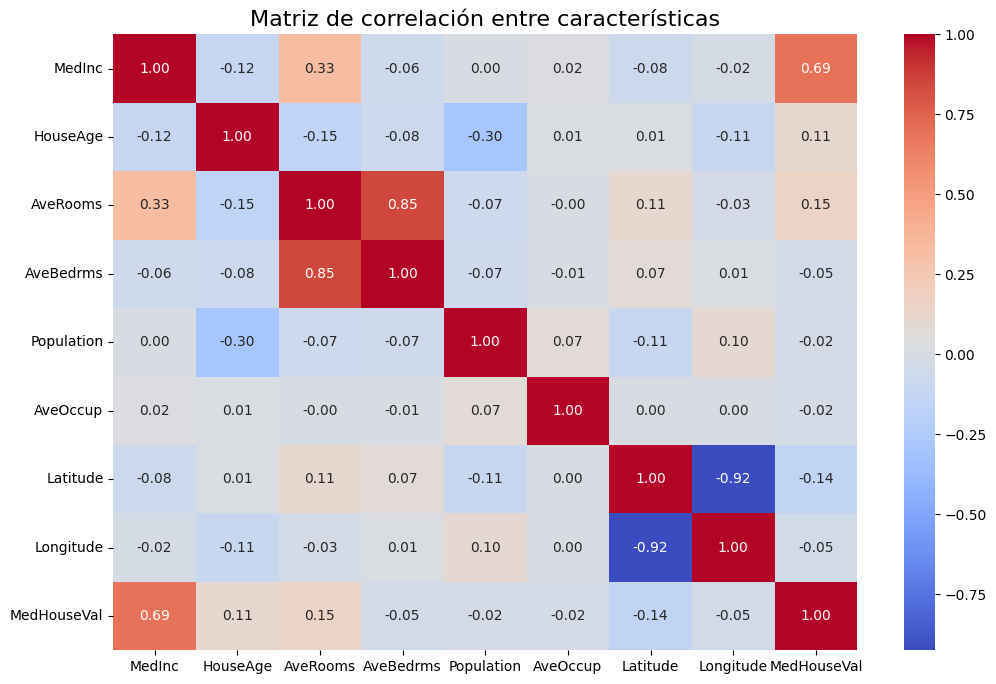

In [17]:
# Calcular matriz de correlación
correlation_matrix = df.corr()

# Visualizar como un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación entre características", fontsize=16)
plt.show()


In [ ]:
DIVISION DEL CONJUNTO DE DATOS

In [22]:
#SEPARAR ENTRENAMIENTO Y PRUEBA

from sklearn.model_selection import train_test_split

# Crear un DataFrame
X = df.drop("MedHouseVal", axis=1)  # Características
y = df["MedHouseVal"]  # Variable objetivo (precio medio de la vivienda)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")


Datos de entrenamiento: (16512, 8)
Datos de prueba: (4128, 8)


In [23]:
#INMPLEMENTAR VALIDACIÓN CRUZADA BASICA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Instanciar el modelo
model = LinearRegression()

# Validación cruzada (5 folds)
scores = cross_val_score(
    model, X_train, y_train, cv=5, scoring="neg_mean_squared_error"
)

# Calcular RMSE promedio y desviación estándar
rmse_scores = np.sqrt(-scores)
print(f"RMSE promedio: {rmse_scores.mean():.4f}")
print(f"Desviación estándar del RMSE: {rmse_scores.std():.4f}")


RMSE promedio: 0.7205
Desviación estándar del RMSE: 0.0103


In [25]:
#Validación cruzada con ajuste de hiperparámetros
#Probamos modelos más complejos, como un Random Forest, y ajustamos hiperparámetros con GridSearchCV.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definir el modelo
rf_model = RandomForestRegressor(random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
}

# Configurar GridSearchCV con validación cruzada (5 folds)
grid_search = GridSearchCV(
    rf_model, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1
)

# Entrenar
grid_search.fit(X_train, y_train)

# Resultados
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)
print("RMSE del mejor modelo (cross-validation):", np.sqrt(-grid_search.best_score_))

KeyboardInterrupt: 

In [26]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Espacio de búsqueda más amplio pero con búsqueda aleatoria
param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_dist, n_iter=10, cv=3, scoring="neg_mean_squared_error", n_jobs=-1, random_state=42
)

# Entrenar
random_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", random_search.best_params_)


Mejores hiperparámetros: {'n_estimators': 300, 'min_samples_split': 5, 'max_depth': None}


In [27]:
#EVALUAMOS EL MODEL FINAL

from sklearn.metrics import mean_squared_error

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular RMSE en los datos de prueba
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE en datos de prueba: {test_rmse:.4f}")


RMSE en datos de prueba: 0.5046


In [ ]:
Visualización de Resultados y Exportación del Modelo

In [28]:
#COMPARAR MODELOS

from sklearn.ensemble import GradientBoostingRegressor

# Instanciar modelos
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
}

# Evaluar cada modelo con validación cruzada
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
    rmse_scores = np.sqrt(-scores)
    results[name] = {
        "Mean RMSE": rmse_scores.mean(),
        "Std RMSE": rmse_scores.std()
    }

# Mostrar resultados
results_df = pd.DataFrame(results).T
print(results_df)


                   Mean RMSE  Std RMSE
Linear Regression   0.720527  0.010285
Random Forest       0.511384  0.004636
Gradient Boosting   0.534073  0.007099


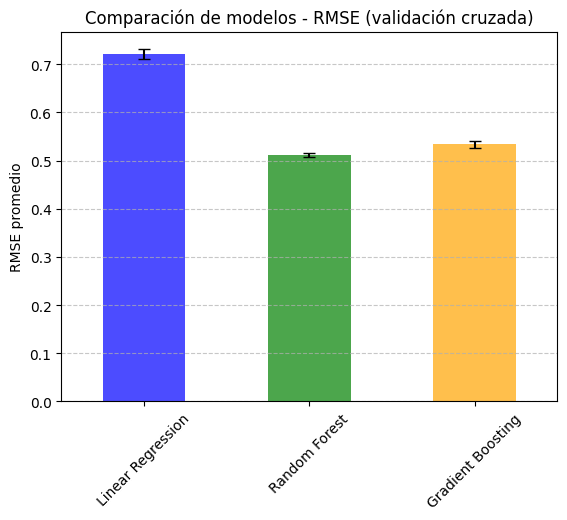

In [29]:
#VISUALIZAR COMPARACIÓN

import matplotlib.pyplot as plt

# Gráfico de barras
results_df["Mean RMSE"].plot(kind="bar", yerr=results_df["Std RMSE"], capsize=4, color=["blue", "green", "orange"], alpha=0.7)
plt.title("Comparación de modelos - RMSE (validación cruzada)")
plt.ylabel("RMSE promedio")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
Mostrar los errores de predicción

In [ ]:
#GRAFICO DE DISPERSION

# Predicciones del mejor modelo
best_model.fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, edgecolors="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", linewidth=2)
plt.title("Valores reales vs. predichos")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.grid(alpha=0.5)
plt.show()

In [ ]:
#HISTOGRAMA DE ERRORES

# Calcular residuos
errors = y_test - y_pred_test

# Histograma
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, color="purple", alpha=0.7, edgecolor="k")
plt.title("Distribución de los errores")
plt.xlabel("Error (Valor real - Valor predicho)")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.5)
plt.show()


In [ ]:
Exportar el mejor modelo

In [31]:
import os
import joblib

# Crear la carpeta 'model/' si no existe
os.makedirs("model", exist_ok=True)

# Guardar el modelo entrenado
joblib.dump(best_model, "model/random_forest_model.pkl")
print("Modelo guardado exitosamente.")


Modelo guardado exitosamente.


In [39]:
import numpy as np
import joblib

# Cargar el modelo guardado
loaded_model = joblib.load("model/random_forest_model.pkl")
print("Modelo cargado exitosamente.")

# Ejemplo de nuevos datos
new_data = np.array([[8.3252, 41.0, 6.984127, 1.023810, 322.0, 2.555556, 37.88, -122.23]])

# Hacer una predicción
prediction = loaded_model.predict(new_data)

# Escalar el resultado a dólares
predicted_price = prediction[0] * 100000
print(f"Predicción del precio de la vivienda: ${predicted_price:,.2f}")

Modelo cargado exitosamente.
Predicción del precio de la vivienda: $423,552.27


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
